In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import boxcluster
from boxcluster import BoxList
from boxcluster import BoxSort
# from boxcluster.boxsort import BoxSort2

from boxcluster.fake_data import generate_nested_data

In [3]:
import pandas as pd
import numpy as np

In [4]:
from plotting import mplot
import matplotlib.pyplot as plt

Solution


/Users/peterwinter/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


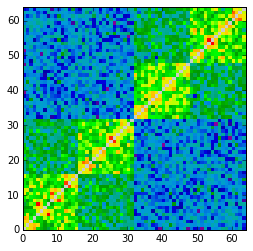

Test


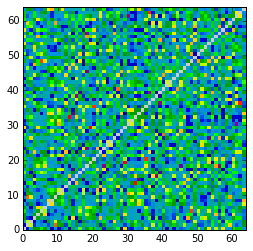

In [5]:
test_soln = generate_nested_data(noise=0.05)
print('Solution')
mplot(test_soln)

n = len(test_soln)
order = np.arange(n)
np.random.shuffle(order)
test = test_soln[:, order][order, :]
print('Test')
mplot(test)

# Test existing code

Result


/Users/peterwinter/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


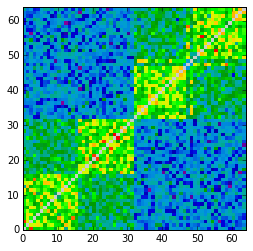

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 62 53 54 55 56 57 58 59 60 61 62]


In [6]:
bs = BoxSort(test)
out = bs(save_history=True)
print('Result')
mplot(out.matrix)
print(out.order)

In [7]:
df = pd.DataFrame(bs.history).set_index('evals')
df.head()

,last_move,moves_this_temp,move_accepted,temp,current_fit,new_fit
evals,,,,,,
0,1,1,True,0.00100,1074.648195,1074.648195
1,2,1,True,0.00099,1074.648195,1074.448364
2,3,2,True,0.00099,1074.448364,1074.448364
3,0,3,True,0.00099,1074.448364,1077.890936
4,1,4,True,0.00099,1077.890936,1077.890936


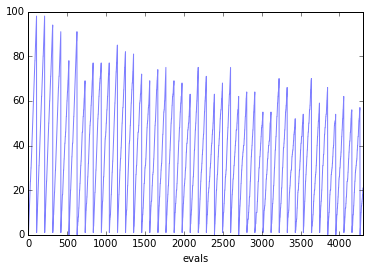

In [8]:
df['moves_this_temp'].plot(alpha=0.5)

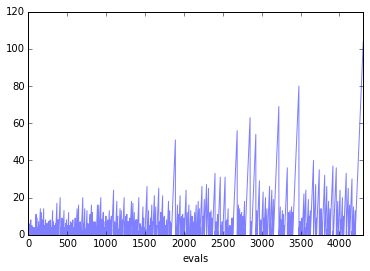

In [9]:
df['last_move'].plot(alpha=0.5)

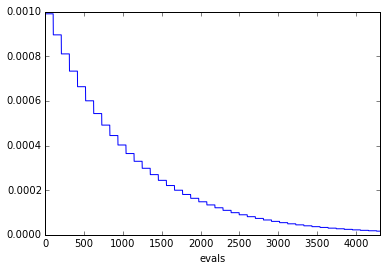

In [10]:
df['temp'].plot()

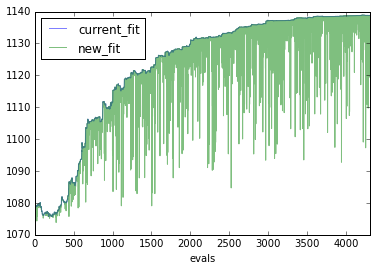

In [11]:
df[['current_fit', 'new_fit']].plot(alpha=0.5)

# Speedtest

In [12]:
def sort():
    bs = BoxSort(test)
    out = bs()
    # return ds_result

%timeit sort()

1 loops, best of 3: 4.22 s per loop


# TroubleShooting BoxOrder object

In [13]:
from boxcluster.boxorder import BaseFitMatrix, BaseSortMatrix, OrderedArray

In [14]:
bo = OrderedArray(test_soln)
bo2 = bo.copy()
bo.order

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])

In [15]:
BaseFitMatrix
BaseSortMatrix
OrderedArray

boxcluster.boxorder.OrderedArray

/Users/peterwinter/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


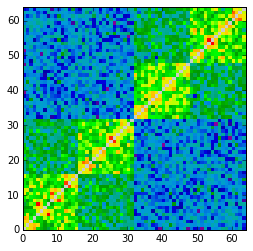

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])

In [16]:
bsm = BaseSortMatrix(test_soln)
m = bsm.matrix
mplot(m)
bsm.order

In [17]:
self = bsm.copy()
self.reorder(order=random_order)

mplot(self.matrix)
print(self.order)
print(random_order)

NameError: name 'random_order' is not defined

In [ ]:
assert (self.order == random_order).all()

In [ ]:

random_order = np.arange(len(test_soln))
np.random.shuffle(random_order)
random_order

m = self.reorder(order=random_order)
mplot(m)
self.order[self.inverse_order()], self.order


inverse = self.inverse_order()
m2 = m[inverse, :][:, inverse]
mplot(m2)

m = self.matrix
mplot(m)
m = self.origional_matrix()
mplot(m)

In [ ]:
mat, new_ord = bo2.propose_move()
print(bo2.fitness, bo.fitness)
mplot(mat)
mplot(bo.matrix)
mplot(test_soln)